<pre style="font-size: 50%;">
Copyright 2018 Google LLC.

Licensed under the Apache License, Version 2.0 (the "License");
you may not use this file except in compliance with the License.
You may obtain a copy of the License at

https://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software
distributed under the License is distributed on an "AS IS" BASIS,
WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
See the License for the specific language governing permissions and
limitations under the License.
</pre>

<img src="//storage.googleapis.com/lucid-link-images/lucid_alpha-warn.png" width=648></img>

# Lucid: A Quick Tutorial

This tutorial quickly introduces [**Lucid**](https://github.com/tensorflow/lucid), a network for visualizing neural networks. Lucid is a kind of spiritual successor to DeepDream, but provides flexible abstractions so that it can be used for a wide range of interpretability research.

**Note**: The easiest way to use this tutorial is [as a colab notebook](https://colab.research.google.com/drive/1XuxLjIZj9MV-lRCpXHBhLo5A41Zs0f8E), which allows you to dive in with no setup. We recommend you enable a free GPU by going:

> **Runtime**   →   **Change runtime type**   →   **Hardware Accelerator: GPU**

Thanks for trying Lucid!



## Install, Import, Load Model

In [ ]:
# Install Lucid

#!pip install --quiet lucid==0.0.4
!pip install --quiet --upgrade-strategy=only-if-needed git+https://github.com/tensorflow/lucid.git

In [1]:
# Imports
import numpy as np
import tensorflow as tf

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

/home/saucecat/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Let's import a model from the Lucid modelzoo!
model = models.InceptionV1()
model.load_graphdef()

## Visualize a Neuron

512 1270.4738



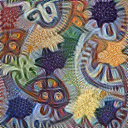

In [3]:
# Visualizing a neuron is easy!

_ = render.render_vis(model, "mixed4a_pre_relu:476")

## Getting a bit deeper

Lucid splits visualizations into a few components which you can fiddle with completely indpendently:

* **objectives** -- What do you want the model to visualize?
* **paramaterization** -- How do you describe the image?
* **transforms** -- What transformations do you want your visualization to be robust to?

In this section, we'll experiment with each one.

**Experimenting with objectives**

512 1675.1682



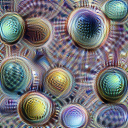

In [4]:
# Let's visualize another neuron using a more explicit objective:

obj = objectives.channel("mixed4a_pre_relu", 465)
_ = render.render_vis(model, obj)

512 1922.3098



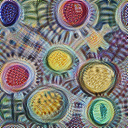

In [5]:
# Or we could do something weirder:
# (Technically, objectives are a class that implements addition.)

channel = lambda n: objectives.channel("mixed4a_pre_relu", n)
obj = channel(476) + channel(465)
_ = render.render_vis(model, obj)

**Transformation Robustness**

Recomended reading: The Feature Visualization article's section titled [The Enemy of Feature Visualization](https://distill.pub/2017/feature-visualization/#enemy-of-feature-vis) discusion of "Transformation Robustness." In particular, there's an interactive diagram that allows you to easily explore how different kinds of transformation robustness effects visualizations.

512 2327.608



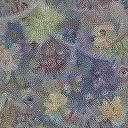

In [6]:
# No transformation robustness

transforms = []
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

512 1879.3564



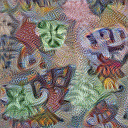

In [7]:
# Jitter 2

transforms = [
    transform.jitter(2)
]
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

512 1222.3684



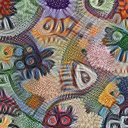

In [8]:
# Breaking out all the stops

transforms = [
    transform.pad(16),
    transform.jitter(8),
    transform.random_scale([n/100. for n in range(80, 120)]),
    transform.random_rotate(range(-10,10) + range(-5,5) + 10*range(-2,2)),
    transform.jitter(2)
]
_ = render.render_vis(model, "mixed4a_pre_relu:476", transforms=transforms)

**Experimenting with paramaterization**

Recomended reading: The Feature Visualization article's section on [Preconditioning and Parameterization](https://distill.pub/2017/feature-visualization/#preconditioning)

512 896.93164



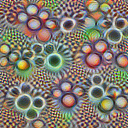

In [9]:
# Using alternate paramaterizations is one of the primary ingredients for
# effective visualization

param_f = lambda: param.image(128, fft=False, decorrelate=False)
_ = render.render_vis(model, "mixed4a_pre_relu:2", param_f)

512 960.41504



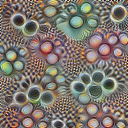

In [10]:
# Using alternate paramaterizations is one of the primary ingredients for
# effective visualization

param_f = lambda: param.image(128, fft=True, decorrelate=True)
_ = render.render_vis(model, "mixed4a_pre_relu:2", param_f)